In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## Center and Standard Deviation

In [2]:
births = Table.read_table('http://inferentialthinking.com/notebooks/baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


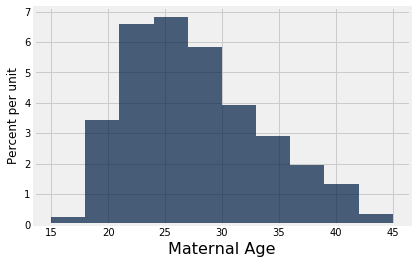

In [3]:
births.hist(2)

In [7]:
avg = np.mean(births.column(2))
avg

27.228279386712096

In [5]:
np.median(births.column(2))

26.0

In [9]:
sd = np.std(births.column(2))
sd

5.8153604041908968

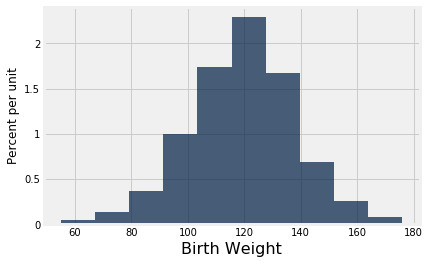

In [10]:
births.hist('Birth Weight')

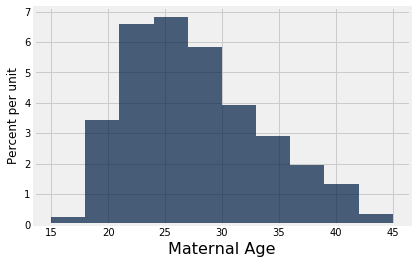

In [11]:
births.hist('Maternal Age')

In [12]:
np.std(births.column('Birth Weight'))

18.320863702202779

In [13]:
np.std(births.column('Maternal Age'))

5.8153604041908968

## Chebyshev

In [14]:
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


In [16]:
avg, sd

(27.228279386712096, 5.8153604041908968)

In [18]:
(births
 .where(2, are.between(avg - 2*sd, avg + 2*sd))
 .num_rows
 / births.num_rows)

0.948892674616695

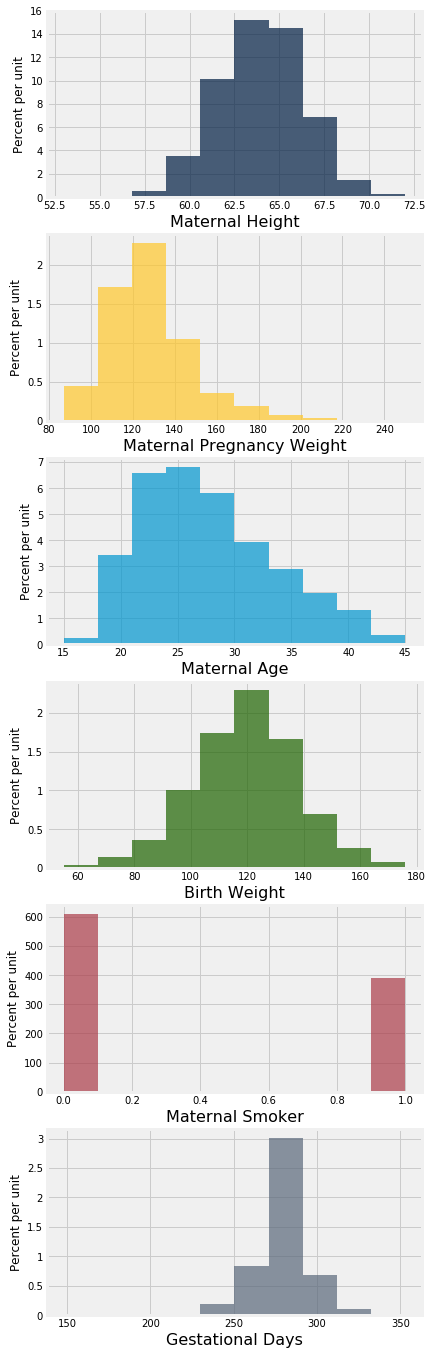

In [20]:
births.hist(overlay=False)

In [21]:
for k in np.arange(6):
    values = births.column(k)
    avg = np.average(values)
    sd = np.std(values)
    print('Column', k)
    for z in np.arange(1, 4):
        within = births.where(k, are.between(avg-z*sd, avg+z*sd))
        print('Average +/-', z, 'SD:',  within.num_rows / births.num_rows)
    print()

Column 0
Average +/- 1 SD: 0.692504258943782
Average +/- 2 SD: 0.948892674616695
Average +/- 3 SD: 0.995741056218058

Column 1
Average +/- 1 SD: 0.7947189097103918
Average +/- 2 SD: 0.9378194207836457
Average +/- 3 SD: 0.9863713798977853

Column 2
Average +/- 1 SD: 0.6746166950596252
Average +/- 2 SD: 0.948892674616695
Average +/- 3 SD: 0.9991482112436116

Column 3
Average +/- 1 SD: 0.6737649063032368
Average +/- 2 SD: 0.9718909710391823
Average +/- 3 SD: 0.9965928449744463

Column 4
Average +/- 1 SD: 0.7385008517887564
Average +/- 2 SD: 0.9505962521294719
Average +/- 3 SD: 0.9863713798977853

Column 5
Average +/- 1 SD: 0.6090289608177172
Average +/- 2 SD: 1.0
Average +/- 3 SD: 1.0



## Standard Units

In [35]:
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


In [25]:
values = births.column(2)
avg = np.mean(births.column(2))
sd = np.std(births.column(2))
avg, sd

(27.228279386712096, 5.8153604041908968)

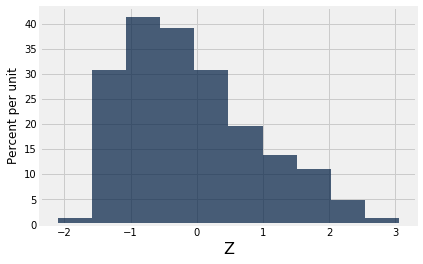

In [28]:
z = (values - avg) / sd
t = Table().with_column('Values', values, 'Z', z)
t.hist(1)

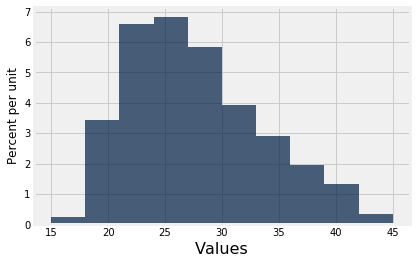

In [29]:
t.hist(0)

## The Normal Distribution

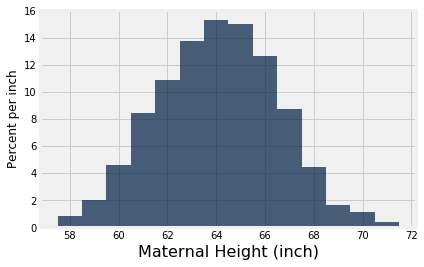

In [30]:
births.hist(3, bins=np.arange(57.5, 72, 1), unit='inch')

In [31]:
np.std(births.column(3))

2.5250254409674375

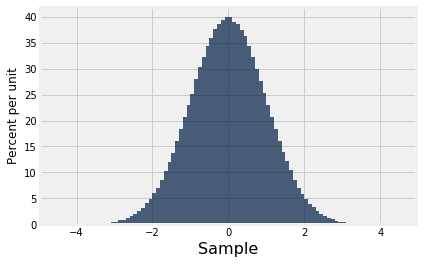

In [32]:
samples = []
for i in np.arange(1e6):
    samples.append(np.random.normal())
Table().with_column('Sample', samples).hist(bins=np.arange(-4.5, 4.6, .1))

## Central Limit Theorem

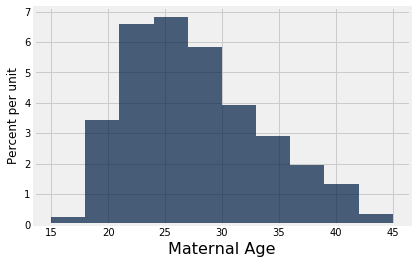

In [33]:
births.hist(2)

In [34]:
np.mean(births.column(2))

27.228279386712096

In [35]:
np.mean(births.sample().column(2))

27.286201022146507

In [43]:
means = []
for i in np.arange(1000):
    means.append(np.mean(births.sample(1000).column(2)))
means[:5]

[27.224, 27.393000000000001, 26.632999999999999, 27.023, 27.280000000000001]

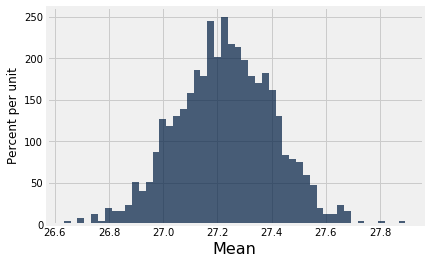

In [44]:
Table().with_column('Mean', means).hist(bins=50)